# ***projekt numerik***

In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import constants as cst
import math as mt
from scipy.linalg import lu_factor, lu_solve, lu


In [2]:
# delta's discretisation

# Time Delta
delta_t = 0.05
#spatial Delta
delta_r = 0.001
#delta_t = delta_r**2/2
n = 4

def t_i(i):
    return i*delta_t

def r_j(j):
    return j*delta_r

#T_i_plus_one = np.zeros((n-1,n-1))


##  Constants and their implementations



In [3]:
#Dichte nach Radius

def rho(dist):

    if(0.0 <=dist <= 0.025):
        return float(cst.WASSER[0])

    if((0.025 < dist <= 0.030) or (0.055< dist) ):
        return float(cst.STAHL[0])

    if(0.030 < dist <= 0.055):
        return float(cst.GLASSWOLLE[0])

# Wärmekapazität nach Radius

def c_p(dist):

    if(0.0 <= dist <= 0.025):
        return float(cst.WASSER[1])

    if((0.025 < dist <= 0.030) or (0.055 < dist) ):
        return float(cst.STAHL[1])

    if(0.030 < dist <= 0.055):
        return float(cst.GLASSWOLLE[1])

#Wärmeleitungskonstante nach Radius

def Lambda(dist):

    if(0.0 <= dist <= 0.025):
        return float(cst.WASSER[2])

    if((0.025 < dist <= 0.030) or (0.055< dist) ):
        return  float(cst.STAHL[2])

    if(0.030 < dist <= 0.055):
        return  float(cst.GLASSWOLLE[2])



## Definition of the function of time and its implementation



In [4]:
Gt=20 # for the first case, where the T(t,R) = g(t)=20 K
n = int(cst.size_rhor/delta_r)
time_size = int(100 / delta_t)

# Explicit

Since the method is explicit, we can directly evaluate $T_{i+1,j}$ at each step.

From equation (4), we isolate $T_{i+1,j}$ as such:

$T_{i+1,j} = u_j \frac{r_j}{\Delta r^2}T_{i,j-1} + [1-u_j(\frac{1}{\Delta r} + \frac{2r_j}{\Delta r^2})]T_{i,j} + u_j(\frac{1}{\Delta r}+ \frac{r_j}{\Delta r^2})T_{i,j+1}$


for $u_j = \frac{\Delta t}{r_j}k_j$ and $k_j = \frac{\lambda _j}{Cp_{j} \rho _j}$

And we can then evaluate the Dirichlet and Neumann conditions at their respective boundaries. 

For this explicit method, we hapen to have a ghostpoint to take care of for j=1, since one of the terms of the equation would be out of bound, $T_{i,j-1}=T_{i,0}$.
To solve this problem, we discretize the condition $T'_{t,0}=0$ and evaluate it at $j=1$ which yields the relationship $T_{i+1,0}=T_{i+1,1}$. 

## explicit model for $g(t) = 20 K$

In [5]:
T = np.zeros([time_size+1,n+1])
T[0, :] = 0 #Anfangsbedigungen
T[0, n] = Gt #Dirichlet condition

for i in range(0,time_size):

    T[i][n] = Gt

    for j in range(1,n):

        r = r_j(j)
        k_j = Lambda(r) / (c_p(r)*rho(r))
        u_j = (delta_t*k_j) / r

        A = T[i][j-1]
        B = T[i][j]
        C = T[i][j+1]
    
        T[i+1][j] = u_j*r/(delta_r**2)*A + (1-u_j*(1/delta_r + 2*r/delta_r**2))*B + u_j*(1/delta_r + r/delta_r**2)*C

    T[i+1, 0] = T[i+1, 1] #Neumann condition 
    T[i+1, n] = Gt

T1 = T


(2001, 61) (2001, 61)


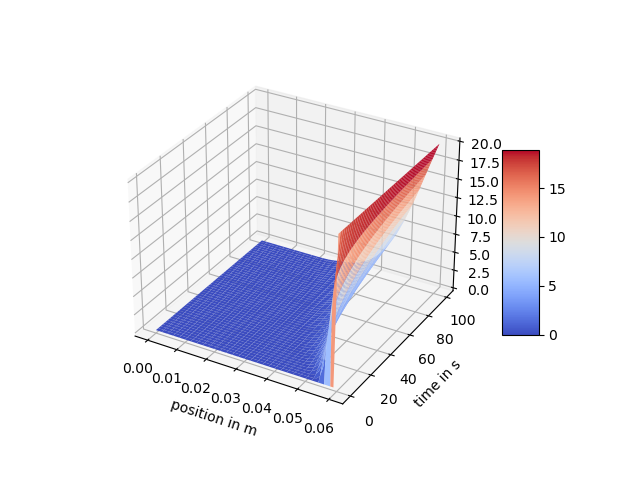

In [6]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time_size+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig1, ax1 = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax1.plot_surface(xA, tA, T1,cmap=cm.coolwarm)
fig1.colorbar(surf, shrink=0.5, aspect=5)
ax1.set_xlabel('position in m')
ax1.set_ylabel('time in s')
ax1.set_zlabel('temperature in K')
plt.show(fig1)


## Explicit model for $g(t) = 20*sin(2*\pi*t)$

In [7]:
T = np.zeros([time_size+1,n+1])
T[0, :] = 0
T[0, n] = 0

print(T[0,:])

for i in range(0,time_size):

    T[i][-1] = 20*mt.sin(2*3.14159265*i*(delta_t))

    for j in range(1,n):

        r = r_j(j)
        k_j = Lambda(r) / (c_p(r)*rho(r))
        u_j = (delta_t*k_j) / r

        A = T[i][j-1]
        B = T[i][j]
        C = T[i][j+1]
    
        T[i+1][j] = u_j*r/(delta_r**2)*A + (1-u_j*(1/delta_r + 2*r/delta_r**2))*B + u_j*(1/delta_r + r/delta_r**2)*C

    T[i+1, 0] = T[i+1, 1]  
    T[i+1, -1] = 20*mt.sin(2*3.14159265*(i*delta_t))

T2 = T

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time_size+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax2.plot_surface(xA, tA, T2,cmap=cm.coolwarm)
fig2.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_xlabel('position in m')
ax2.set_ylabel('time in s')
ax2.set_zlabel('temperature in K')


(2001, 61) (2001, 61)


Text(0.5, 0, 'temperature in K')

## Implicit model

for the implicit model, we put equation (5) in the following form:

$-w_j T_{i+1,j-1} + (1+v_j+2w_j) T_{i+1,j}-(v_j+w_j)T_{i+1,j+1}=T_{i,j}$

With $v_j = \frac{u_j}{\Delta r}$ , $w_j=2r_j \frac{u_j}{\Delta r^2}$ and $u_j = \frac{\lambda_j \Delta t}{r_j C_{p,j} \rho_j}$

For **j=1**, the equation yields:

$-w_1 T_{i+1,0} + (1+v_1+2w_1) T_{i+1,1}-(v_1+w_1)T_{i+1,2}=T_{i,1}$

$T_{i+1,0}$ is problematic, as it is out of our boundaries (ghostpoint), but with the Neumann condition at $T'_{t,0}=0$, we can say that $T'_{t,0} = T_{t,1}$, therefore:

$-w_1 T_{i+1,1} + (1+v_1+2w_1) T_{i+1,1}-(v_1+w_1)T_{i+1,2}=T_{i,1}$

$(1+v_1+w_1) T_{i+1,1}-(v_1+w_1)T_{i+1,2}=T_{i,1}$

For **j=n-1** the equation yields:

$-w_{n-1} T_{i+1,n-2} + (1+v_{n-1}+2w_{n-1}) T_{i+1,n-1}-(v_{n-1}+w_{n-1})T_{i+1,n}=T_{i,n-1}$

$T_{i+1,n}$ is problematic, but we know the boundary condition $T_{i+1,n}= g(t)$ and therefore we can rewrite the equation as follow:

$-w_{n-1} T_{i+1,n-2} + (1+v_{n-1}+2w_{n-1}) T_{i+1,n-1} = T_{i,n-1}+(v_{n-1}+w_{n-1})T_{i+1,n}$, with $T_{i+1,n}= g(t)$.



With the boudary problems taken care of and a general expression for the linear problem to solve, we can create a system of linear equations of the form $Ax=b$, where A is the **coefficient** matrix for the $T_{i+1,..}$, and b is a vector of $T_{i,...}$.

The matrix A is tridiagonal, which allows for a quick solving of the system using LR decomposition.

At each time step i, we evaluate a system of n-1 equation, which yields the temperature vectors $ T_{i,j}, 1 \leq j \leq n-1$

## Implicit model for $g(t) = 20$

In [ ]:

A = np.zeros([n-1,n-1])

def U_j(r):
    return (Lambda(r) * delta_t)/(r*rho(r)*c_p(r))

def V_j(r,uj):
    return uj/delta_r

def W_j (r,uj):
    return (2*r*uj)/(delta_r**2)

#function generating the tridiagonal matrix A
for j in range (0,n-1):

    r = r_j(j+1)
    Uj = U_j(r)
    Vj = V_j(r,Uj)
    Wj = W_j(r,Uj)

    A[j,j] = 1+Vj+2*Wj
#first coeff.
    if j == 0:
        A[j,j]= 1+Vj+Wj
#upper diagonal
    if (j+1) <= (n-2):
        A[j,j+1] = -(Vj+Wj)
#lower diagonal  
    if j-1 >= 0:
        A[j,j-1] = -Wj

#LU factorization of A
lu_A, P = lu_factor(A)

T = np.zeros([time_size+1,n+1])
T[0, :] = 0

r_final = r_j(n-1)
U_final = U_j(0.005)
Vfinal = V_j(r_final,U_final)
Wfinal = W_j(r_final,U_final)
#T[:,n] = Gt*(Vfinal+Wfinal) #boundary conditions at R. Here we use n-1 since the iteration goes from 0 to n-1

b=np.zeros(n-1)

T[:,-1]=Gt

#we solve the systems
for i in range (1,time_size):
    
    b = T[i,1:n]

    b[-1] += Gt*(Vfinal+Wfinal)/2

    T[i+1,1:n] = lu_solve((lu_A,P),b) 

T3 = T


In [ ]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time_size+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax3.plot_surface(xA, tA, T3,cmap=cm.coolwarm)
fig3.colorbar(surf, shrink=0.5, aspect=5)
ax3.set_xlabel('position in m')
ax3.set_ylabel('time in s')

## Implicit model for $g(t) = 20*sin(2*\pi*t)$

In [ ]:
T = np.zeros([time_size+1,n+1])
T[0, :] = 0

r_final = r_j(n-1)
U_final = U_j(0.005)
Vfinal = V_j(r_final,U_final)
Wfinal = W_j(r_final,U_final)
#T[:,n] = Gt*(Vfinal+Wfinal) #boundary conditions at R. Here we use n-1 since the iteration goes from 0 to n-1
b=np.zeros(n-1)


for i in range (0,time_size+1):
    T[i,-1]= 20*mt.sin(2*3.14159265*((i)*delta_t))

for i in range (1,time_size):

    b = T[i,1:n]

    b[-1] += 20*mt.sin(2*3.14159265*((i+1)*delta_t))*(Vfinal+Wfinal)

    T[i+1,1:n] = lu_solve((lu_A,P),b) 

T4 = T

In [ ]:
# Graphische Darstellung
x = np.array(range(n+1))*delta_r
t = np.array(range(time_size+1))*delta_t

xA, tA = np.meshgrid(x, t)
print(tA.shape, xA.shape)

# Plot the surface.
fig4, ax4 = plt.subplots(subplot_kw={"projection": "3d"}, num=1)
surf = ax4.plot_surface(xA, tA, T4,cmap=cm.coolwarm)
fig4.colorbar(surf, shrink=0.5, aspect=5)
ax4.set_xlabel('position in m')
ax4.set_ylabel('time in s')


# Conclusions

As long as $\Delta_t < \frac{\Delta_x ^2}{2}$ both methods are stable, and the calculation time doesn't "explode".
If $\Delta_t < 1$, both method for the sinus start to oscillate more and more, until they mostly become noise.
whenever large time steps or high spatial resolution is necessary, the implicit method yields better results than the explicit method.

While the explicit method is easier to implement, the implicit method yields solutions that are closer to the true values of the system we try to simulate.


